## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [33]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [34]:
print(df.head())
print(df.tail())

                  DATE       TAG  POSTS
0  2008-07-01 00:00:00        c#      3
1  2008-08-01 00:00:00  assembly      8
2  2008-08-01 00:00:00         c     83
3  2008-08-01 00:00:00        c#    505
4  2008-08-01 00:00:00       c++    164
                     DATE     TAG  POSTS
2477  2023-06-01 00:00:00     php   1937
2478  2023-06-01 00:00:00  python  11455
2479  2023-06-01 00:00:00       r   2685
2480  2023-06-01 00:00:00    ruby    228
2481  2023-06-01 00:00:00   swift   1145


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [35]:
print(f"df shape: {df.shape}")

df shape: (2482, 3)


**Challenge**: Count the number of entries in each column of the dataframe

In [36]:
df.count()

DATE     2482
TAG      2482
POSTS    2482
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [37]:
df.groupby('TAG').sum().sort_values('POSTS', ascending=False)

<ipython-input-37-23947b4c39c2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('TAG').sum().sort_values('POSTS', ascending=False)


,POSTS
TAG,
javascript,2497345
python,2140620
java,1898378
c#,1593993
php,1458288
c++,795050
r,492002
c,397097
swift,327818


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [38]:
df.groupby('TAG').count().sort_values('POSTS', ascending=False)

,DATE,POSTS
TAG,,
c#,180,180
assembly,179,179
c,179,179
c++,179,179
delphi,179,179
java,179,179
javascript,179,179
perl,179,179
php,179,179


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [91]:
# Inspect data
print(df['DATE'][1])
print(df.DATE[1])

# Typeof column
print(type(df.DATE[1]))

# Convert entire column
df['DATE'] = pd.to_datetime(df['DATE'])
df['DATE']

2008-08-01 00:00:00
2008-08-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


0      2008-07-01
1      2008-08-01
2      2008-08-01
3      2008-08-01
4      2008-08-01
          ...    
2477   2023-06-01
2478   2023-06-01
2479   2023-06-01
2480   2023-06-01
2481   2023-06-01
Name: DATE, Length: 2482, dtype: datetime64[ns]

## Data Manipulation



In [92]:
# Test of .pivot() method

test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu'],
                        'Power': [100, 80, 25, 50, 99, 75, 5]})
print(test_df)

pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
print(pivoted_df)

     Age      Actor  Power
0  Young       Jack    100
1  Young     Arnold     80
2  Young      Keanu     25
3  Young  Sylvester     50
4    Old       Jack     99
5    Old     Arnold     75
6    Old      Keanu      5
Actor  Arnold   Jack  Keanu  Sylvester
Age                                   
Old      75.0   99.0    5.0        NaN
Young    80.0  100.0   25.0       50.0


In [51]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1641.0,754.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,956.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [52]:
reshaped_df.shape

(180, 14)

In [53]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [54]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1641.0,754.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,956.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [55]:
reshaped_df.count()

TAG
assembly      179
c             179
c#            180
c++           179
delphi        179
go            164
java          179
javascript    179
perl          179
php           179
python        179
r             177
ruby          179
swift         171
dtype: int64

In [59]:
reshaped_df.fillna(0, inplace=True)

In [58]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

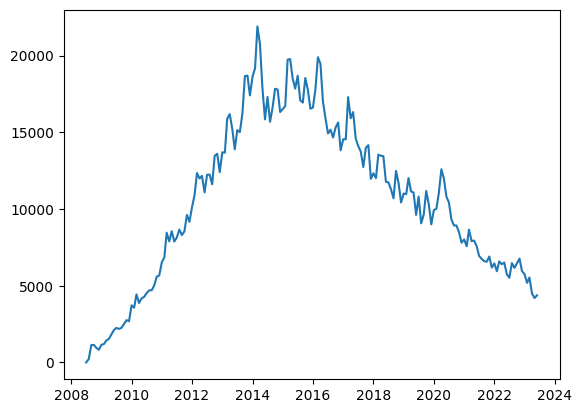

In [64]:
plt.plot(reshaped_df.index, reshaped_df['java'])

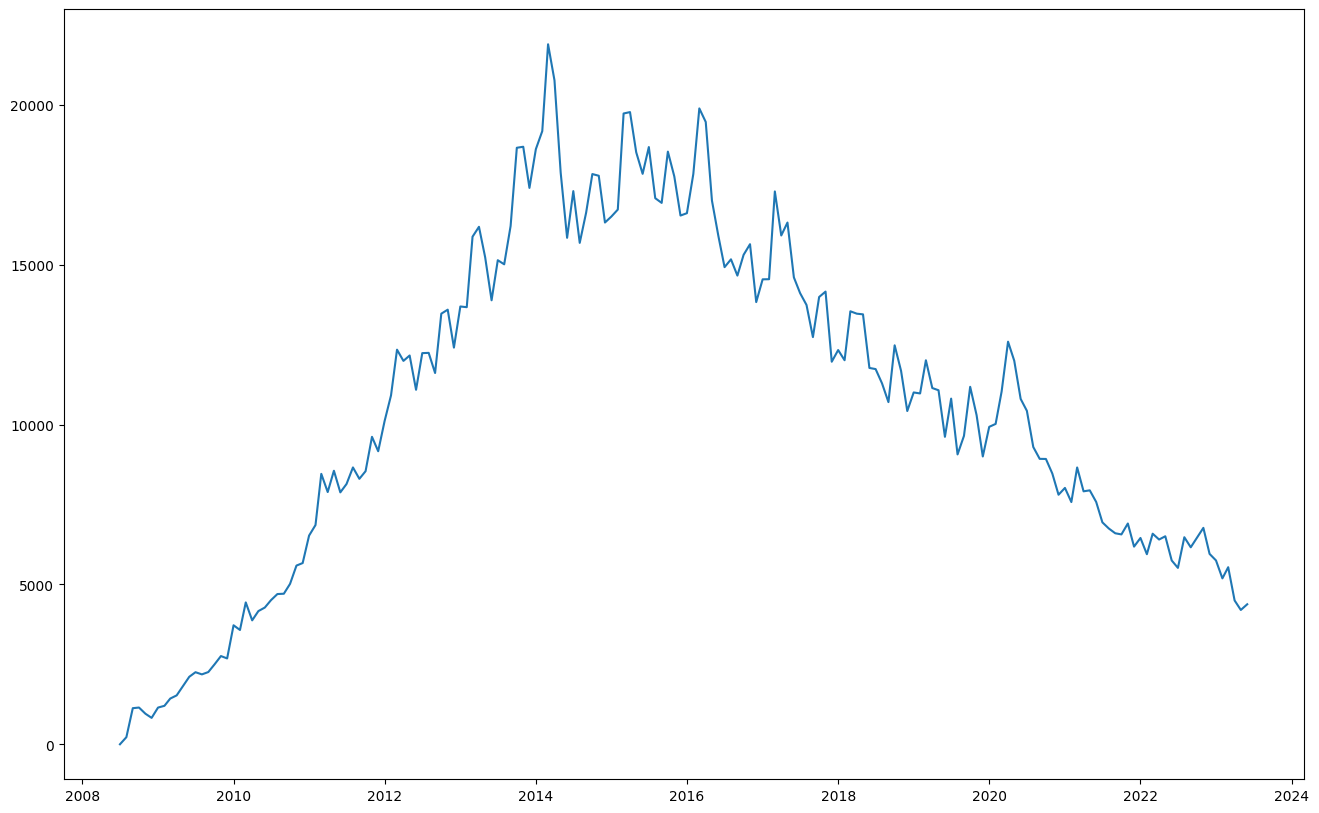

In [65]:
plt.figure(figsize=(16,10))
plt.plot(reshaped_df.index, reshaped_df.java)

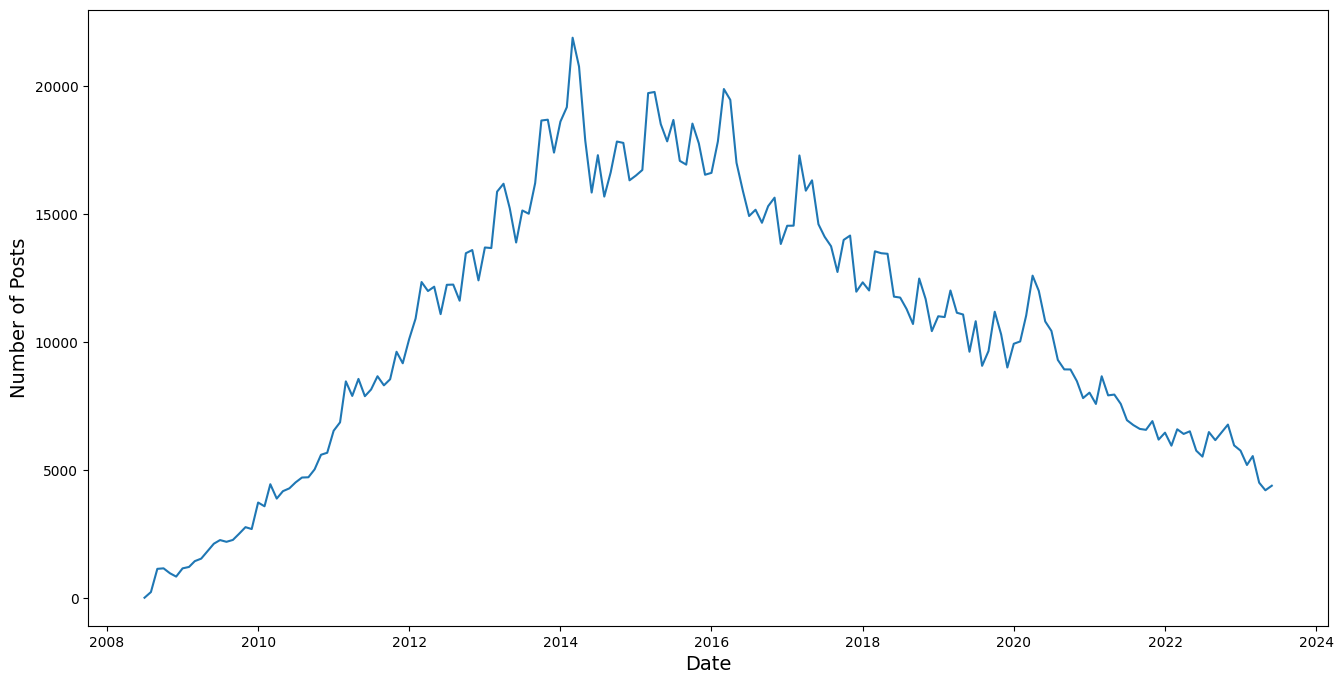

In [73]:
plt.figure(figsize=(16,8))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
# plt.ylim(0, 25000)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

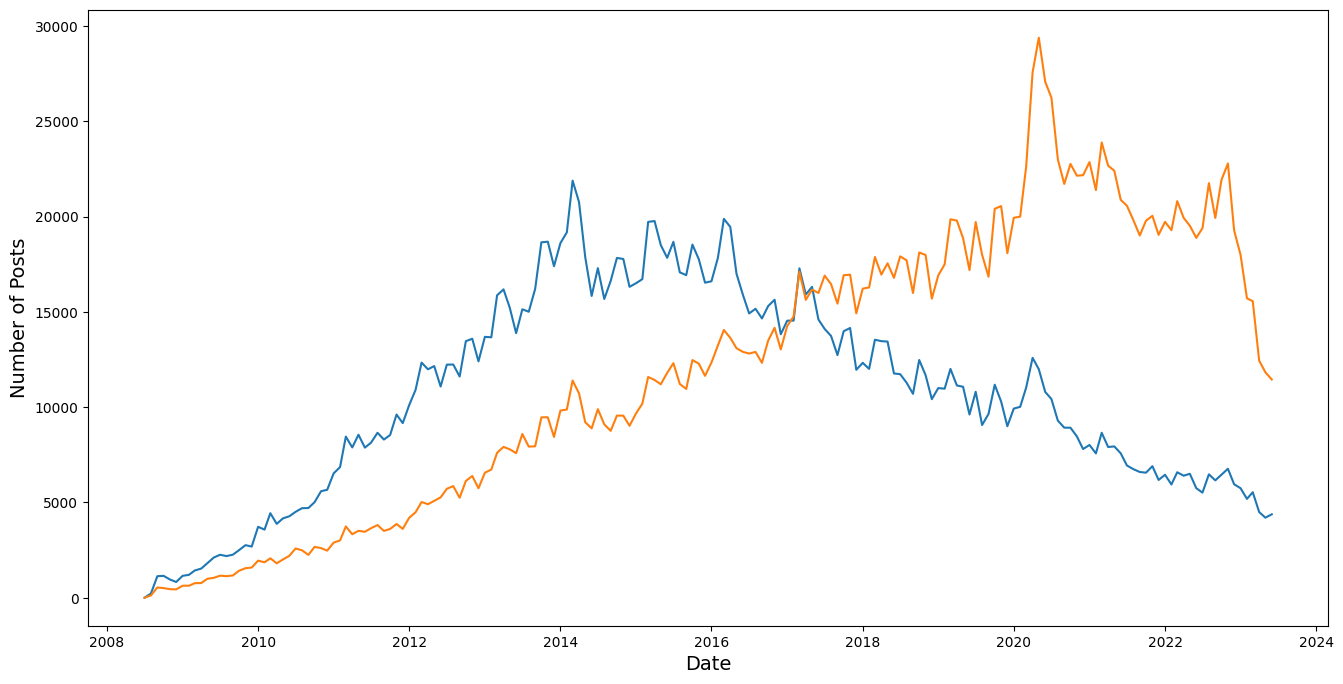

In [77]:
plt.figure(figsize=(16,8))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
# plt.plot(reshaped_df.index, reshaped_df.java, '-g', reshaped_df.index, reshaped_df.python, '-b')
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

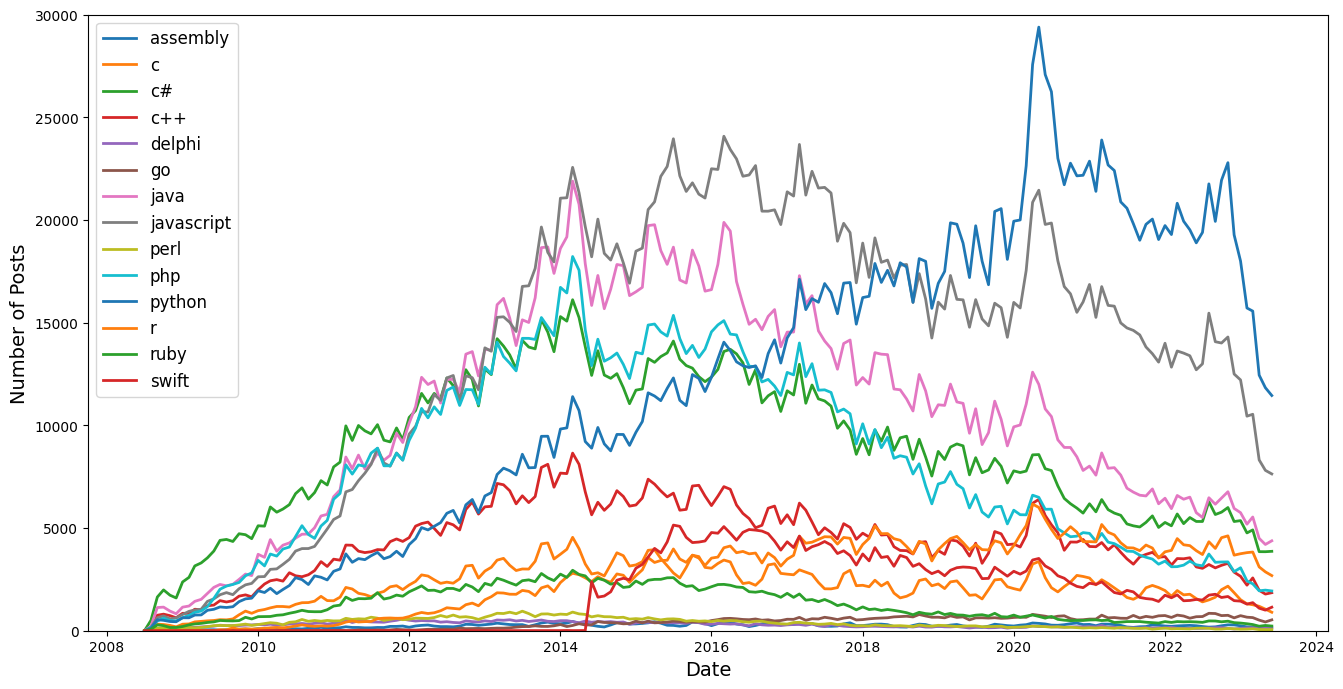

In [80]:
# Print all the programing langueges in the same chart

plt.figure(figsize=(16,8))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 30000)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=2, label=reshaped_df[column].name)
plt.legend(fontsize=12)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

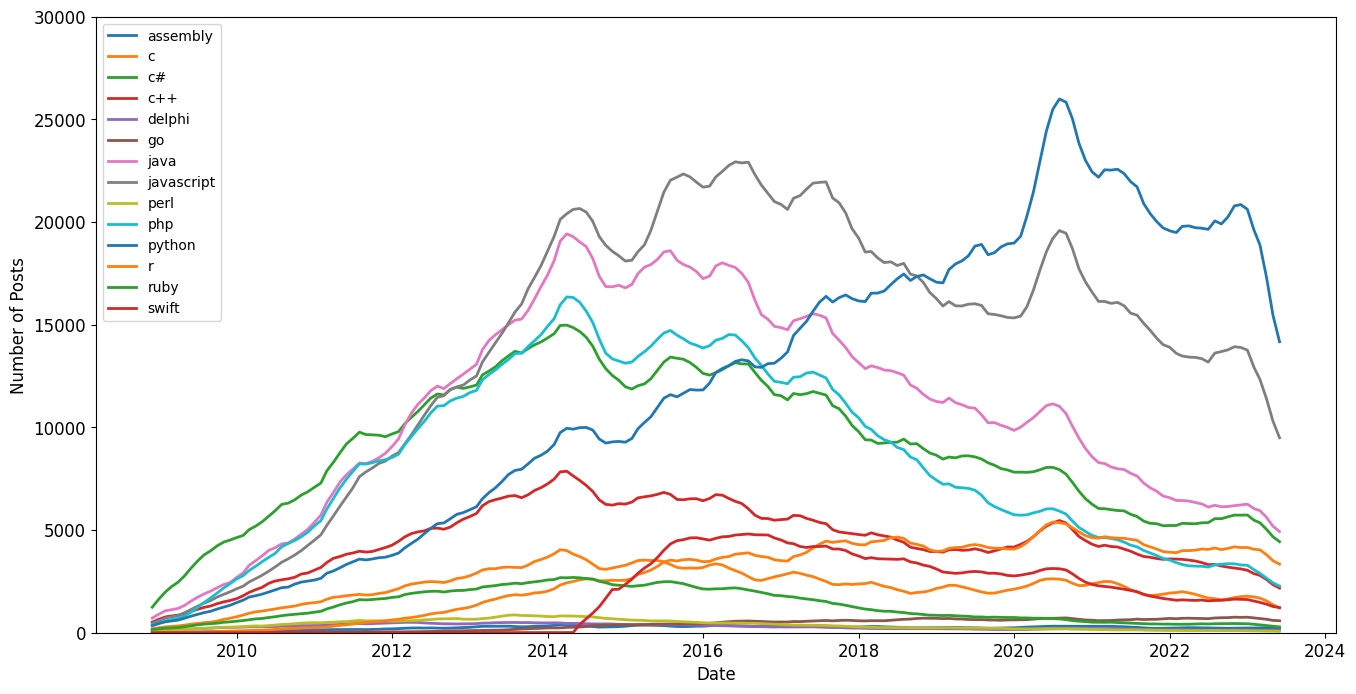

In [90]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,8))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.ylim(0, 30000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 30000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=2, label=roll_df[column].name)

plt.legend(fontsize=10)